In [1]:
#Handwriting digits dataset (MNIST)


In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)# parameters
training_epochs = 15
batch_size = 100

In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # data set is big, binding batches! 
                                          shuffle=True,   # data is shuffle
                                          drop_last=True) #if data has no information at the end, the data is taken away

In [7]:
# nn layers Node(or units) = 256 
linear1 = torch.nn.Linear(784, 256, bias=True) #Input layer
linear2 = torch.nn.Linear(256, 256, bias=True) #Hidden layer
linear3 = torch.nn.Linear(256, 10, bias=True)  #output layer
relu = torch.nn.ReLU() #Activation fuction is Relu 

In [8]:
# Initialization
torch.nn.init.normal_(linear1.weight) # xavier initialization torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.normal_(linear2.weight) # torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.normal_(linear3.weight) # torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.6645,  0.6646,  0.7159,  ..., -0.3040, -0.8945, -0.7977],
        [-1.2045,  2.4545, -1.8073,  ..., -1.7139, -0.0451,  0.3864],
        [ 0.3414,  0.3114, -1.9218,  ..., -0.4525, -0.6849,  0.9663],
        ...,
        [ 1.3915, -0.4048,  0.2338,  ..., -0.8257, -0.8397,  1.9816],
        [ 1.0414,  0.2130, -0.0417,  ...,  1.7541, -0.6454, -0.0821],
        [-0.1162, -1.2692,  0.8201,  ..., -0.8303, -0.5022,  0.0583]],
       requires_grad=True)

In [9]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [10]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) #Adam Optimiser 

In [11]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 129.413299561
Epoch: 0002 cost = 36.166305542
Epoch: 0003 cost = 23.086570740
Epoch: 0004 cost = 15.989409447
Epoch: 0005 cost = 11.555795670
Epoch: 0006 cost = 8.507574081
Epoch: 0007 cost = 6.359047413
Epoch: 0008 cost = 4.775888443
Epoch: 0009 cost = 3.597442627
Epoch: 0010 cost = 2.749284983
Epoch: 0011 cost = 2.104791164
Epoch: 0012 cost = 1.626359701
Epoch: 0013 cost = 1.245584369
Epoch: 0014 cost = 1.025017500
Epoch: 0015 cost = 0.755999088
Learning finished


Accuracy: 0.9465000033378601
Label:  8
Prediction:  8


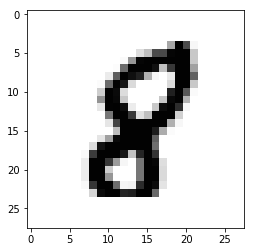

In [18]:
# Test the model using test sets
import matplotlib.pyplot as plt
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()